### About Dataset ###
This dataset contains 17,880 job descriptions out of which about 866 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

#### Data Gathering and Exploring ####

In [1]:
# Dependencies for the project (Run only once)
# %pip install seaborn
# %pip install scikit-learn
# %pip install imbalanced-learn
# %pip install tensorflow
# %pip install tf-keras

In [2]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [3]:
df = pd.read_csv('fake_job_postings.csv')

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Removing any leading, and trailing whitespaces in columns
df.columns = df.columns.str.strip()

# Getting an overview of the features and their types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Check for missing values
sumIsNull = df.isnull().sum()
sortedIsNull = sumIsNull[sumIsNull > 0].sort_values(ascending=False)
print(sortedIsNull)

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
dtype: int64


In [6]:
# For text columns, replace missing values with Null
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna('Null')

# For other categorical columns, replace missing values with relevant placeholders
df.fillna({
    'location': 'Unknown',
    'department': 'Unknown',
    'salary_range': 'Not Specified',
    'employment_type': 'Not Specified',
    'required_experience': 'Not Specified',
    'required_education': 'Not Specified',
    'industry': 'Not Specified',
    'function': 'Not Specified'
}, inplace=True)

In [7]:
# Check for missing values (all the columns should have 0 missing values)
print(df.isnull().sum())

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


In [8]:
# Calculate the total number of job postings
total_postings = len(df)

# Calculate the number of fraudulent postings
fraudulent_postings = df['fraudulent'].value_counts().get(1, 0) 

# Calculate the percentage of fraudulent postings
fraud_percentage = (fraudulent_postings / total_postings) * 100

print(f'Total Job Postings: {total_postings}')
print(f'Number of Fraudulent Postings: {fraudulent_postings}')
print(f'Percentage of Fraudulent Postings: {fraud_percentage:.2f}%')

Total Job Postings: 17880
Number of Fraudulent Postings: 866
Percentage of Fraudulent Postings: 4.84%


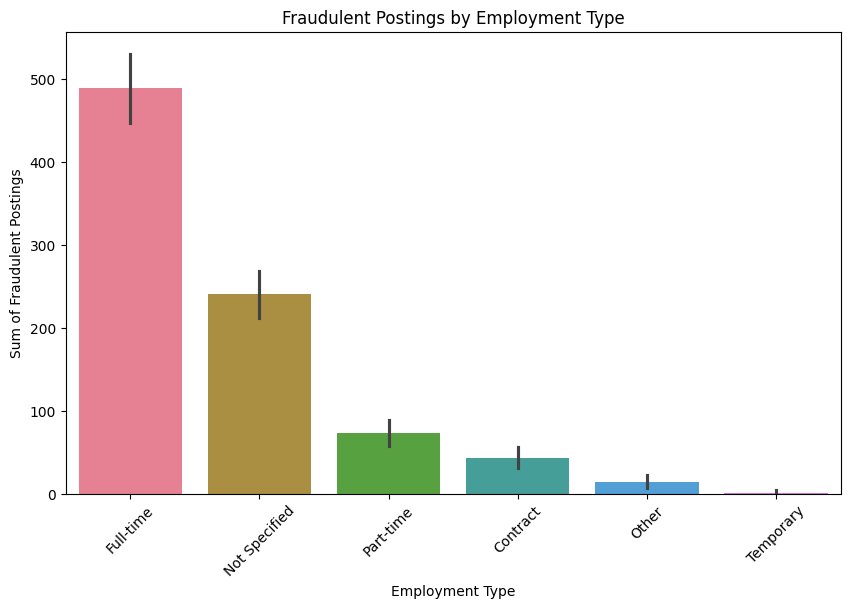

In [9]:
# Bar plot for employment_type sorted by sum of fraudulent postings
plt.figure(figsize=(10, 6))
employment_order = df.groupby('employment_type')['fraudulent'].sum().sort_values(ascending=False).index
palette = sns.color_palette("husl", len(employment_order))  # Generate a palette with unique colors
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum, order=employment_order, palette=palette)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

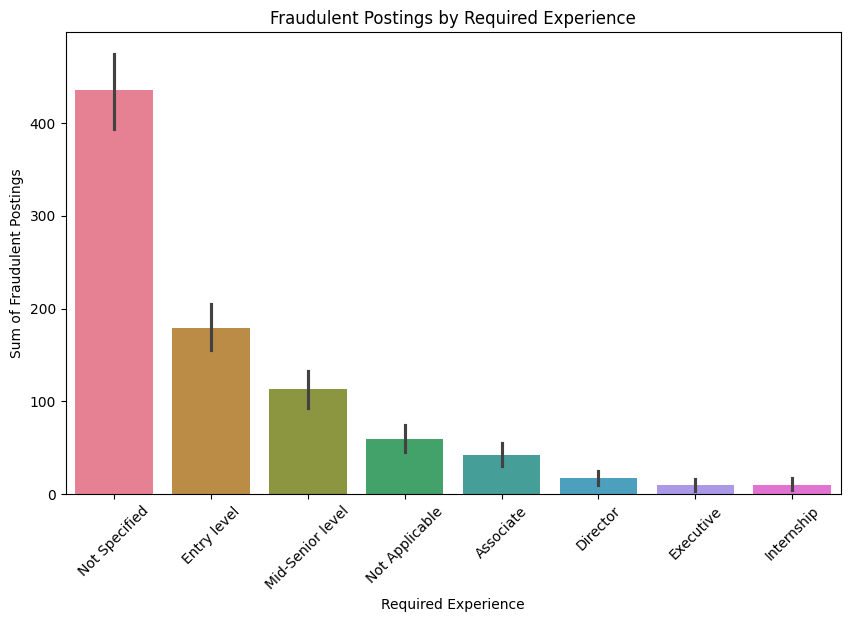

In [10]:
# Bar plot for required_experience sorted by sum of fraudulent postings
plt.figure(figsize=(10, 6))
experience_order = df.groupby('required_experience')['fraudulent'].sum().sort_values(ascending=False).index
palette = sns.color_palette("husl", len(experience_order))  # Generate a palette with unique colors
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum, order=experience_order, palette=palette)
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

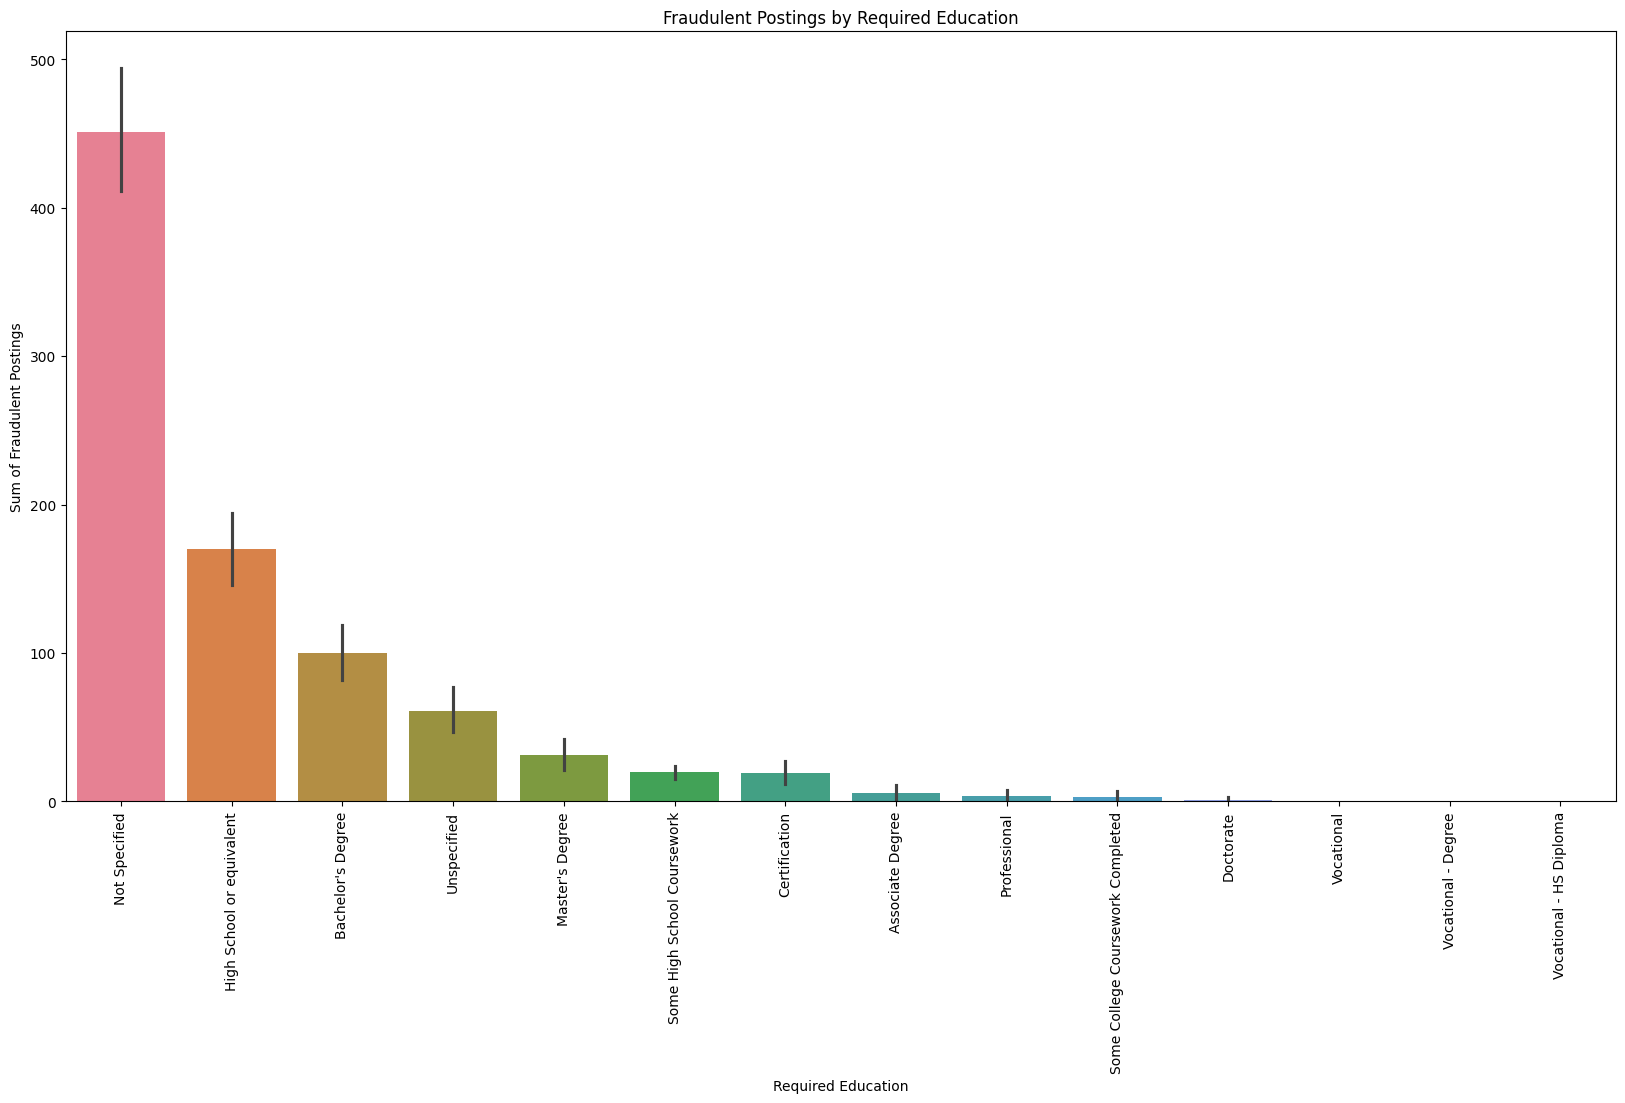

In [11]:
# Bar plot for required_education sorted by sum of fraudulent postings
plt.figure(figsize=(20, 10))
education_order = df.groupby('required_education')['fraudulent'].sum().sort_values(ascending=False).index
palette = sns.color_palette("husl", len(education_order))  # Generate a palette with unique colors
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum, order=education_order, palette=palette)
plt.title('Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=90)
plt.show()

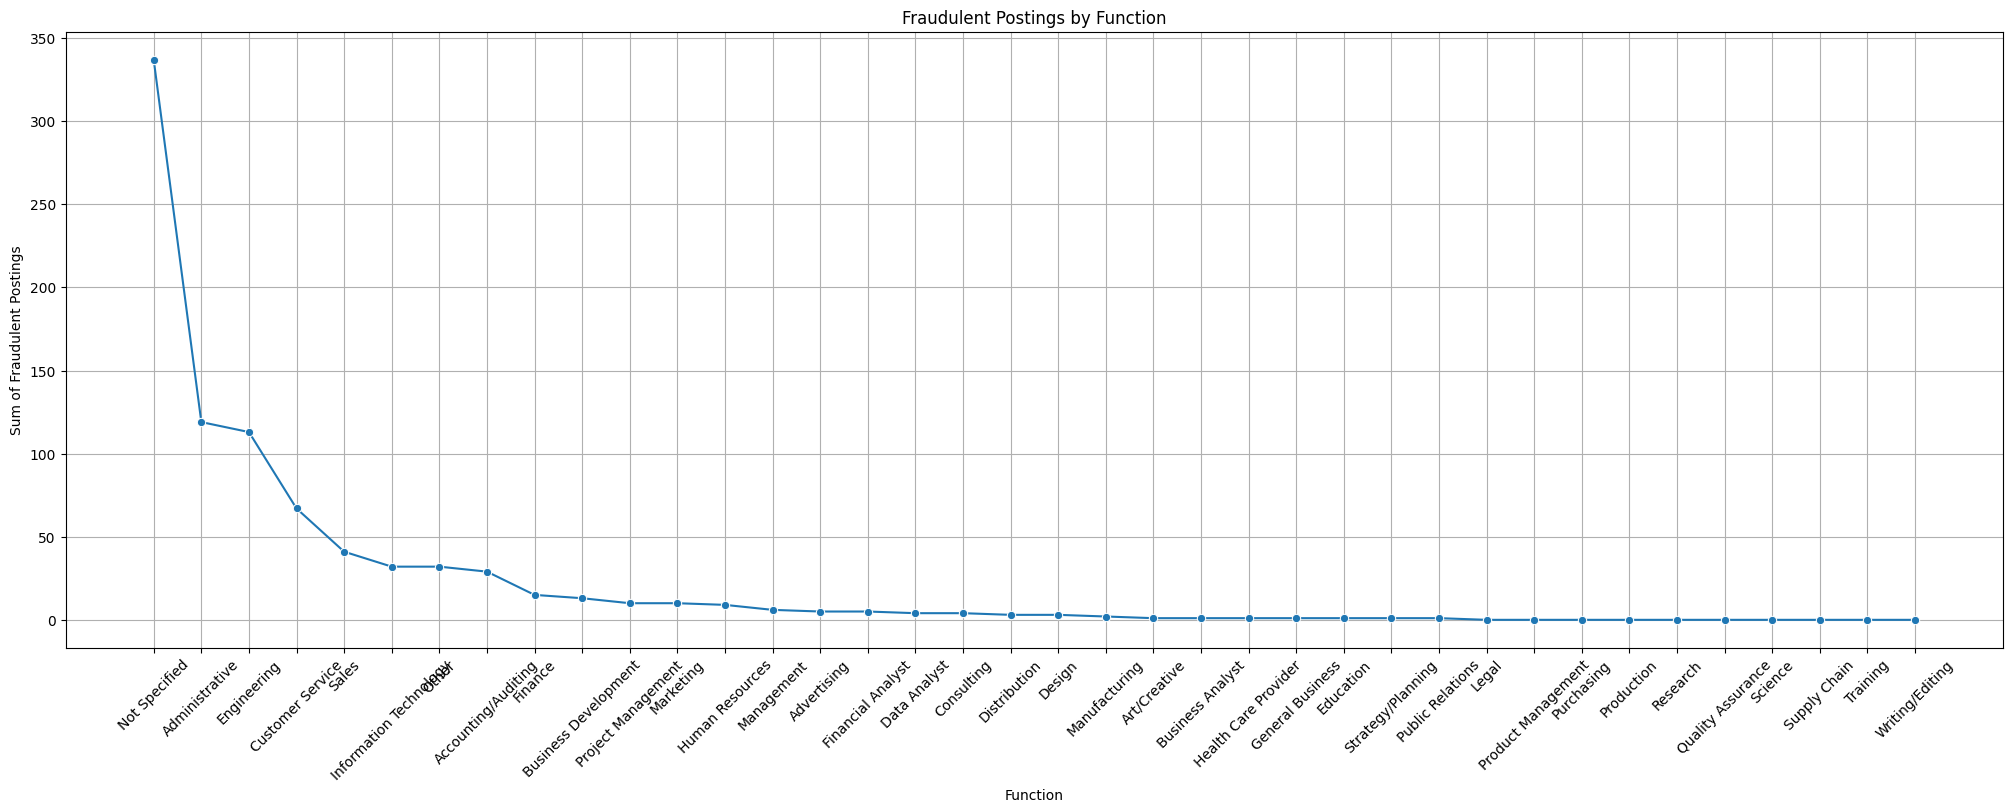

In [12]:
# Calculate the sum of fraudulent postings by function and sort in descending order
fraudulent_summary = df.groupby('function')['fraudulent'].sum().reset_index().sort_values(by='fraudulent', ascending=False)

plt.figure(figsize=(25, 8))
sns.lineplot(data=fraudulent_summary, x='function', y='fraudulent', marker='o')
plt.title('Fraudulent Postings by Function')
plt.xlabel('Function')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

#### Text Preprocessing ####

In [13]:
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    return text

# Apply preprocessing to relevant text columns
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

#### ML Model by Random Forest ####

In [14]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Combine Text Features
df['combined_text'] = df[text_columns].agg(' '.join, axis=1)

# Vectorization
# Using TF-IDF for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

# Train-Test Split
X = df['combined_text']  # Feature set
y = df['fraudulent']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the vectorizer on training data and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Resampling: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_tfidf, y_train)

# Check the new class distribution after SMOTE
smote_class_distribution = pd.Series(y_smote).value_counts(normalize=True)
print("New Class Distribution after SMOTE:\n", smote_class_distribution)

New Class Distribution after SMOTE:
 fraudulent
0    0.5
1    0.5
Name: proportion, dtype: float64


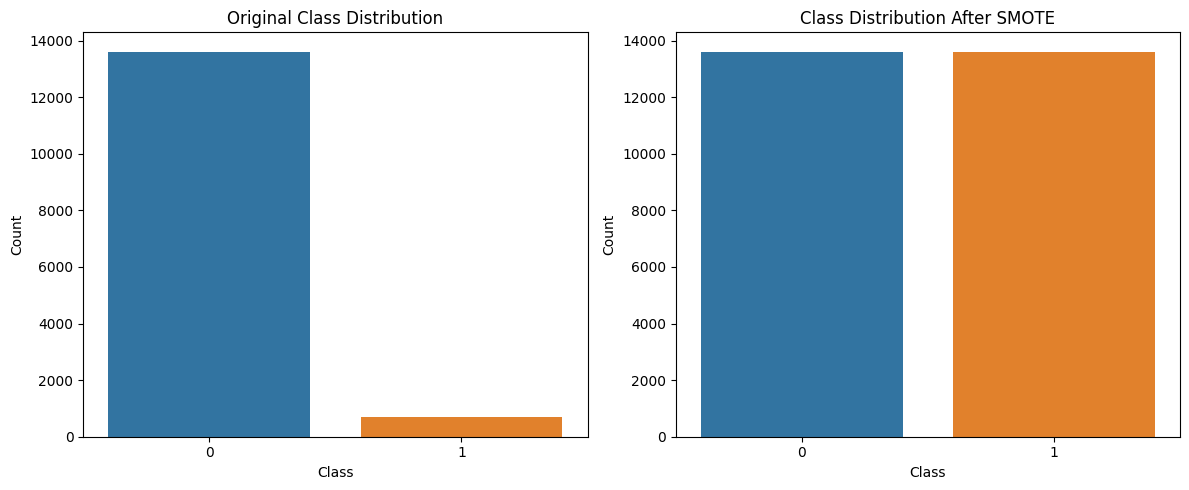

In [15]:
plt.figure(figsize=(12, 5))

# Define a more beautiful color palette
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=colors)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_smote, palette=colors)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_smote, y_smote) 

RandomForestClassifier(random_state=42)

In [17]:
# Evaluation
y_pred = model.predict(X_test_tfidf)

In [18]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.99      0.64      0.78       173

    accuracy                           0.98      3576
   macro avg       0.99      0.82      0.88      3576
weighted avg       0.98      0.98      0.98      3576



Confusion Matrix:
 [[3402    1]
 [  62  111]]


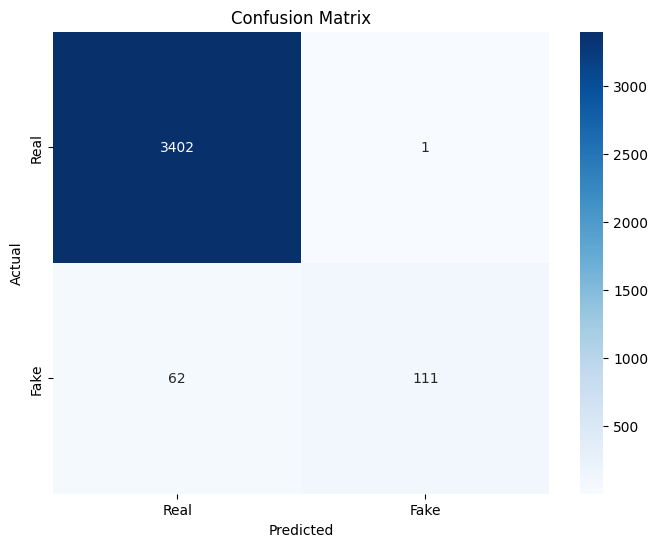

In [19]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()